In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [23]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# 한글 폰트 설정

# pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 가설 1. 채용분야별 지원율

In [6]:
df_application = pd.read_csv('data/Application.csv')
df_job = pd.read_csv('data/Job.csv')

In [13]:
df_merged = pd.merge(df_job, df_application, on='job_uuid', how='left')
df = df_merged[['job_field', 'user_uuid', 'job_uuid']]

df

,job_field,user_uuid,job_uuid
0,SW 개발,97b84257-2685-4608-96c3-87894927f7c9,764292b0-53f8-4f14-ac83-6eafc7a6a18d
1,HW 개발,NaN,b2b598d6-9ca3-4eb4-ac9c-bb57a6dad2ad
2,디자인,NaN,017f4d7d-91a9-4ef7-9dd7-afabf7cbd26d
3,마케팅,d412f031-93f5-4833-8ab9-f3a5b8c4cdf5,41707ef1-f733-4f58-bb29-0b2e6175cf5e
4,마케팅,bed7ea04-23fa-4b1d-b705-9be44a21332d,41707ef1-f733-4f58-bb29-0b2e6175cf5e
...,...,...,...
404899,SW 개발,36babb9f-5ddc-48af-afc5-0e43a2311a31,03f1d118-22e3-4659-aa66-565d3e963176
404900,SW 개발,8a669e51-4219-44e1-8584-e3330304468b,03f1d118-22e3-4659-aa66-565d3e963176
404901,운영,NaN,40308e61-c272-45bc-af2f-0e2e3a29f152
404902,운영,NaN,e4ae1cdb-4ffc-48da-bc91-507b1f97a46f


In [29]:
# 중복된 행 확인
print(df[df.duplicated()])

# 첫 번째 출현을 제외한 중복 행 확인
print(df[df.duplicated(keep='first')])

# 중복 행 완전 제거
df_unique = df.drop_duplicates()

       job_field                             user_uuid  \
12            운영  cad90de0-12f6-402c-89f3-6134da08f251   
65         SW 개발  f79077d6-eda8-4b0c-969d-181727db751e   
82           마케팅  2ece8d7d-79b6-4522-928b-8dbae8843fab   
83           마케팅  2ece8d7d-79b6-4522-928b-8dbae8843fab   
101        SW 개발  2ece8d7d-79b6-4522-928b-8dbae8843fab   
...          ...                                   ...   
404754     SW 개발  78bdbdcd-d7fa-4287-b089-2deca065d749   
404832     SW 개발  2ece8d7d-79b6-4522-928b-8dbae8843fab   
404835     SW 개발  2ece8d7d-79b6-4522-928b-8dbae8843fab   
404851     SW 개발  2ece8d7d-79b6-4522-928b-8dbae8843fab   
404897     SW 개발  2ece8d7d-79b6-4522-928b-8dbae8843fab   

                                    job_uuid  
12      c5062807-2624-4509-a135-16dae8e63220  
65      8ba7ff5d-8610-449b-9da3-ca96577275a4  
82      c0e8d954-f1a5-468e-b3b4-803baea4be55  
83      c0e8d954-f1a5-468e-b3b4-803baea4be55  
101     571b25cb-3070-476d-80f6-217d4791dd3a  
...                  

In [54]:
# 각 분야별 총 공고 수 계산
job_postings_per_field = df_unique.groupby('job_field')['job_uuid'].nunique()

# 각 공고별 지원자 존재 여부 확인 후 분야별로 지원된 공고 수 계산
applied_jobs_per_field = df_unique[df_unique['user_uuid'].notna()].groupby('job_field')['job_uuid'].nunique()

# 분야별 지원율 계산 (지원된 공고 수 / 총 공고 수)
application_rates = (applied_jobs_per_field / job_postings_per_field) * 100

In [57]:
job_postings_per_field

job_field
HW 개발     1095
SW 개발    58923
게임 개발      644
경영지원      6541
기획/PM    11719
디자인      19872
마케팅      19963
비즈니스     10459
운영       14611
투자         420
Name: job_uuid, dtype: int64

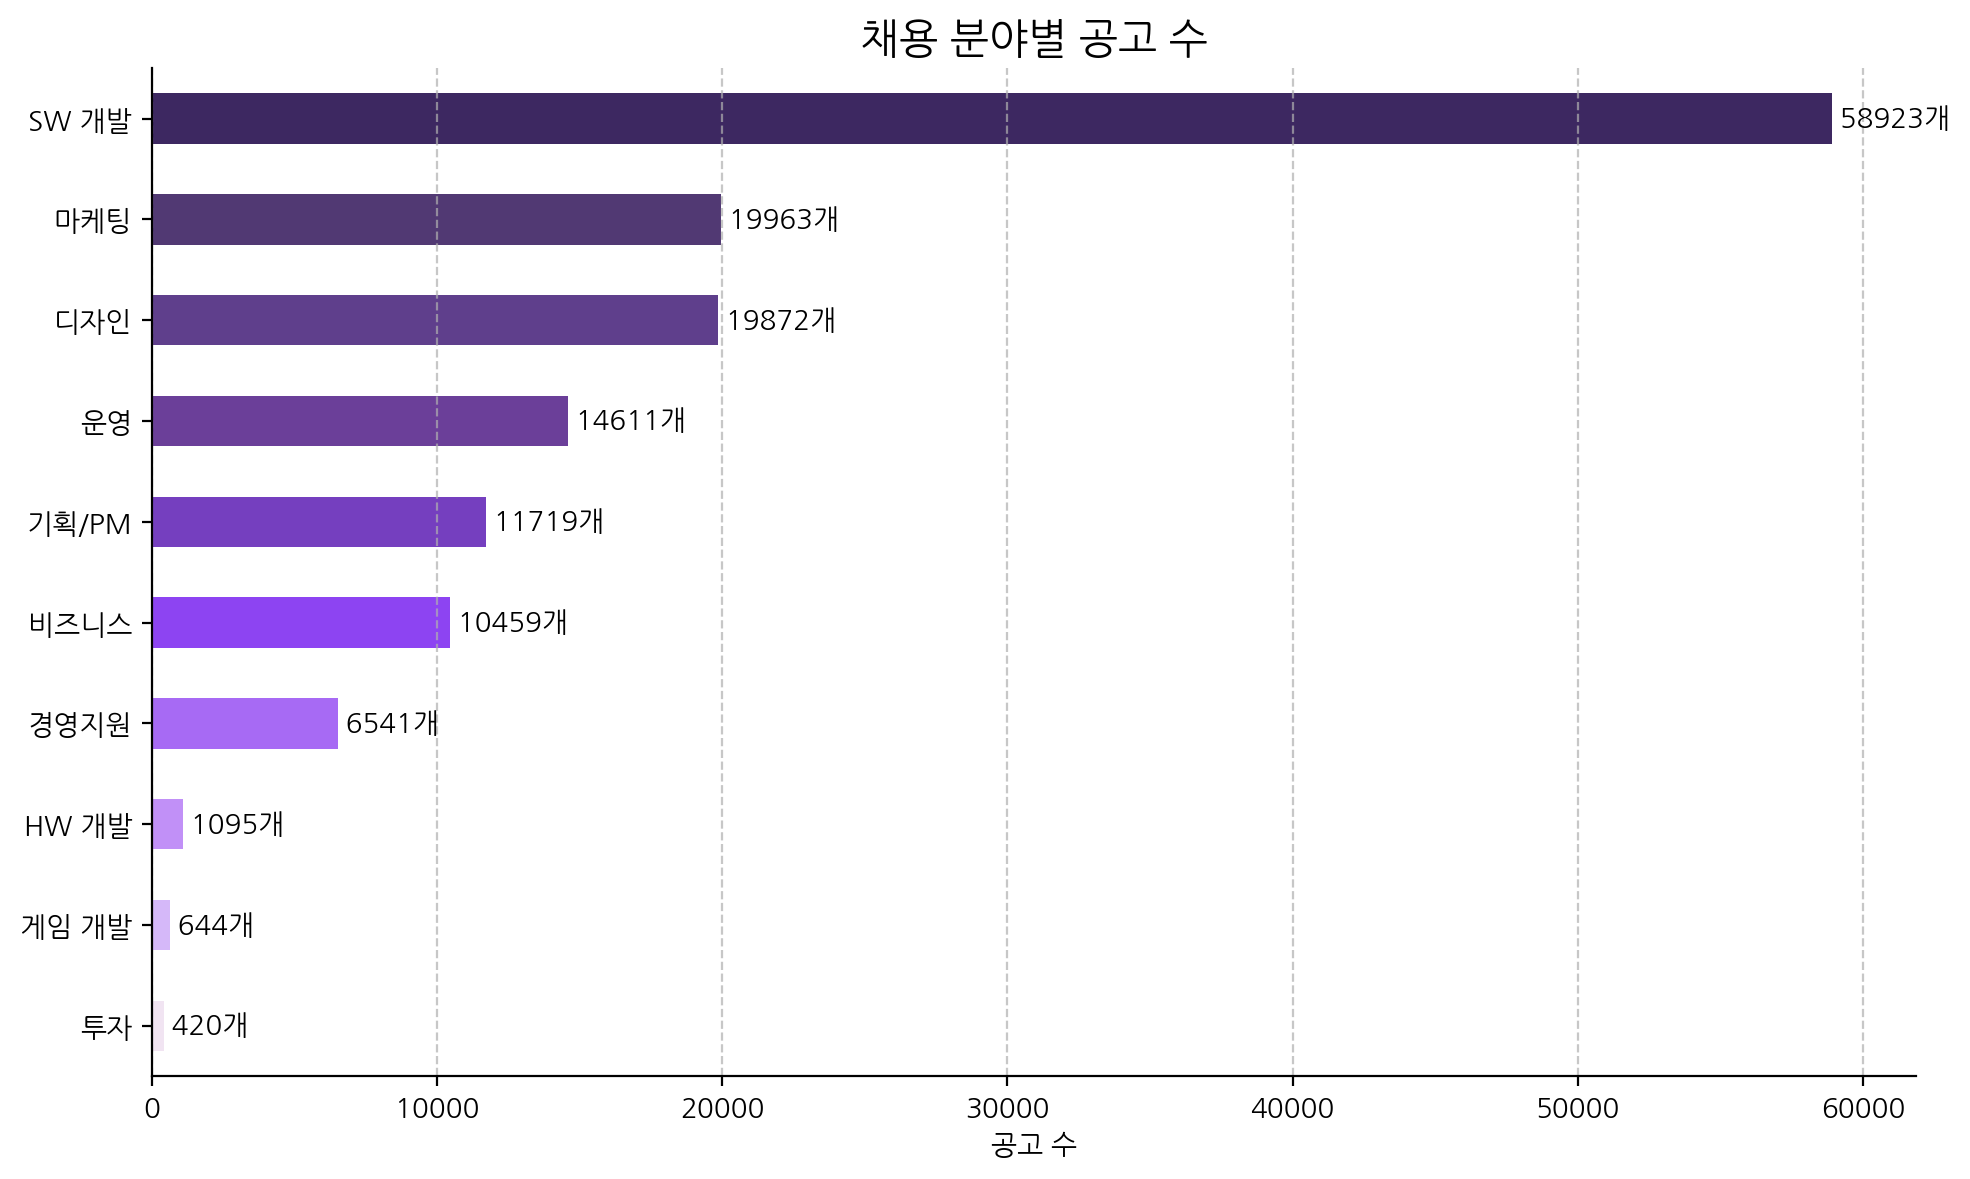

In [109]:
# 채용 분야별 공고 수 계산
job_postings_per_field = df.groupby('job_field')['job_uuid'].nunique().sort_values()

plt.figure(figsize=(10, 6))

# 색상 그라데이션 설정
colors = ['#F1E4F2', '#D5B8F9', '#C190F7', '#A76AF4', '#8D44F2', '#753FBF', '#6B3F99', '#5F3F8C', '#513973', '#3D2861']
color_gradient = [colors[min(int(i//(len(job_postings_per_field)/len(colors))), len(colors)-1)] for i in range(len(job_postings_per_field))]

# 막대 그래프 생성
job_postings_per_field.plot(kind='barh', color=color_gradient)

# 막대 오른쪽에 공고 수 표시
for i, v in enumerate(job_postings_per_field):
    plt.text(v, i, f' {v}개', va='center')

plt.title('채용 분야별 공고 수', fontsize=15)
plt.xlabel('공고 수')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# y축 레이블 제거 및 테두리 제거
plt.ylabel('')  
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

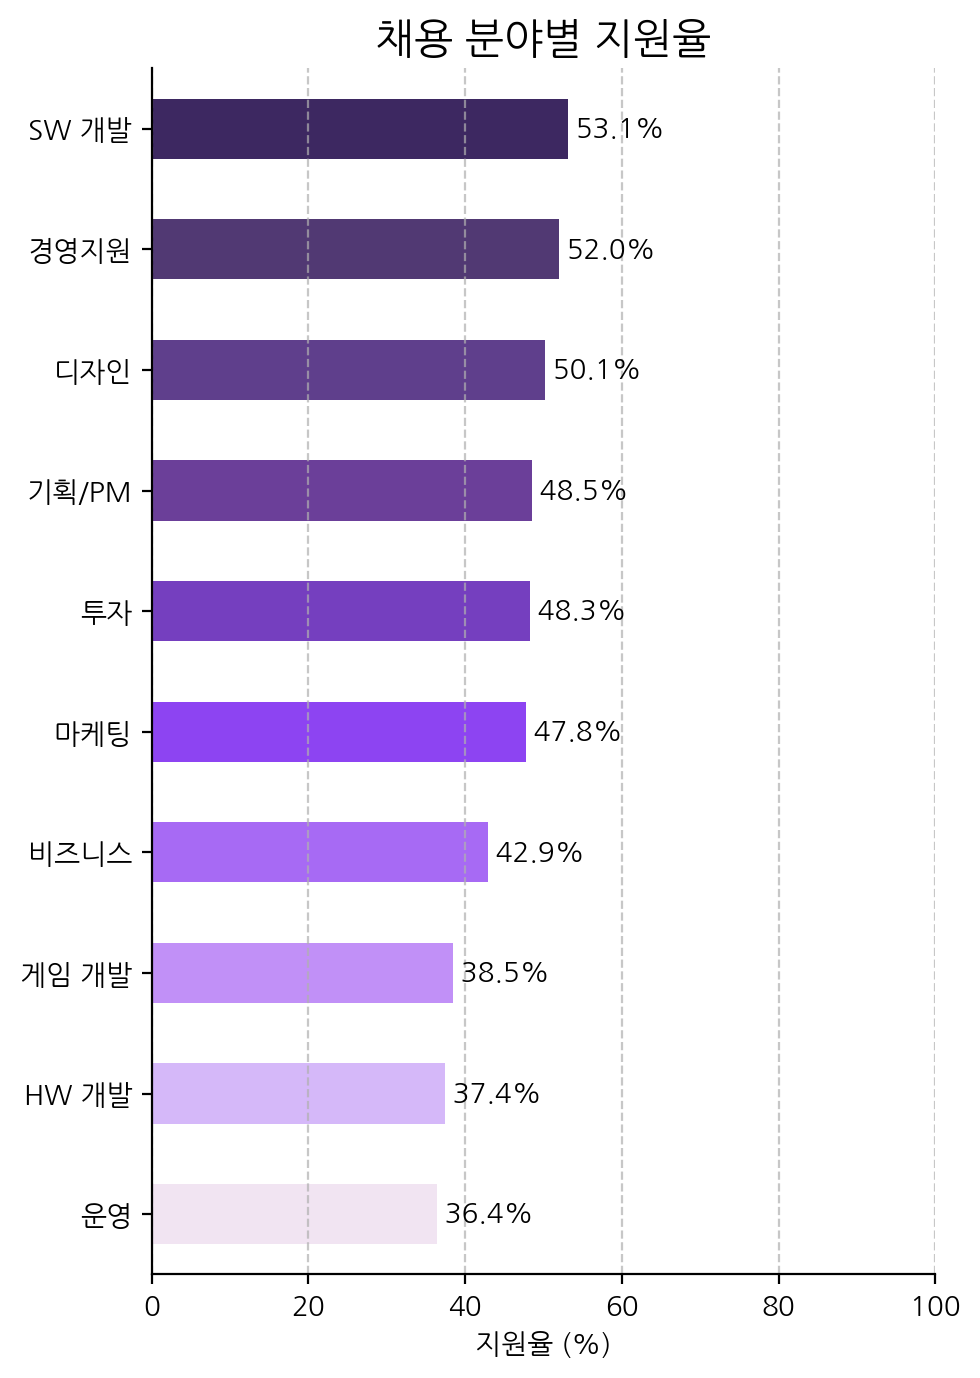

In [108]:
plt.figure(figsize=(5, 7))

# 지원율 정렬 및 색상 그라데이션 설정
application_rates_sorted = application_rates.sort_values()
colors = ['#F1E4F2', '#D5B8F9', '#C190F7', '#A76AF4', '#8D44F2', '#753FBF', '#6B3F99', '#5F3F8C', '#513973', '#3D2861']

color_gradient = [colors[min(int(i//(len(application_rates_sorted)/len(colors))), len(colors)-1)] for i in range(len(application_rates_sorted))]

# 막대 그래프 생성
bars = application_rates_sorted.plot(kind='barh', color=color_gradient)

# 막대 오른쪽에 퍼센트 값 표시
for i, v in enumerate(application_rates_sorted):
    plt.text(v, i, f' {v:.1f}%', va='center')

plt.title('채용 분야별 지원율', fontsize=15)
plt.xlabel('지원율 (%)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# y축 레이블 제거 및 테두리 제거
plt.ylabel('')  # y축 레이블 빈 문자열로 설정
plt.gca().spines['top'].set_visible(False)  # 위 테두리 제거
plt.gca().spines['right'].set_visible(False)  # 오른쪽 테두리 제거

# x축 범위를 0-100으로 설정
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


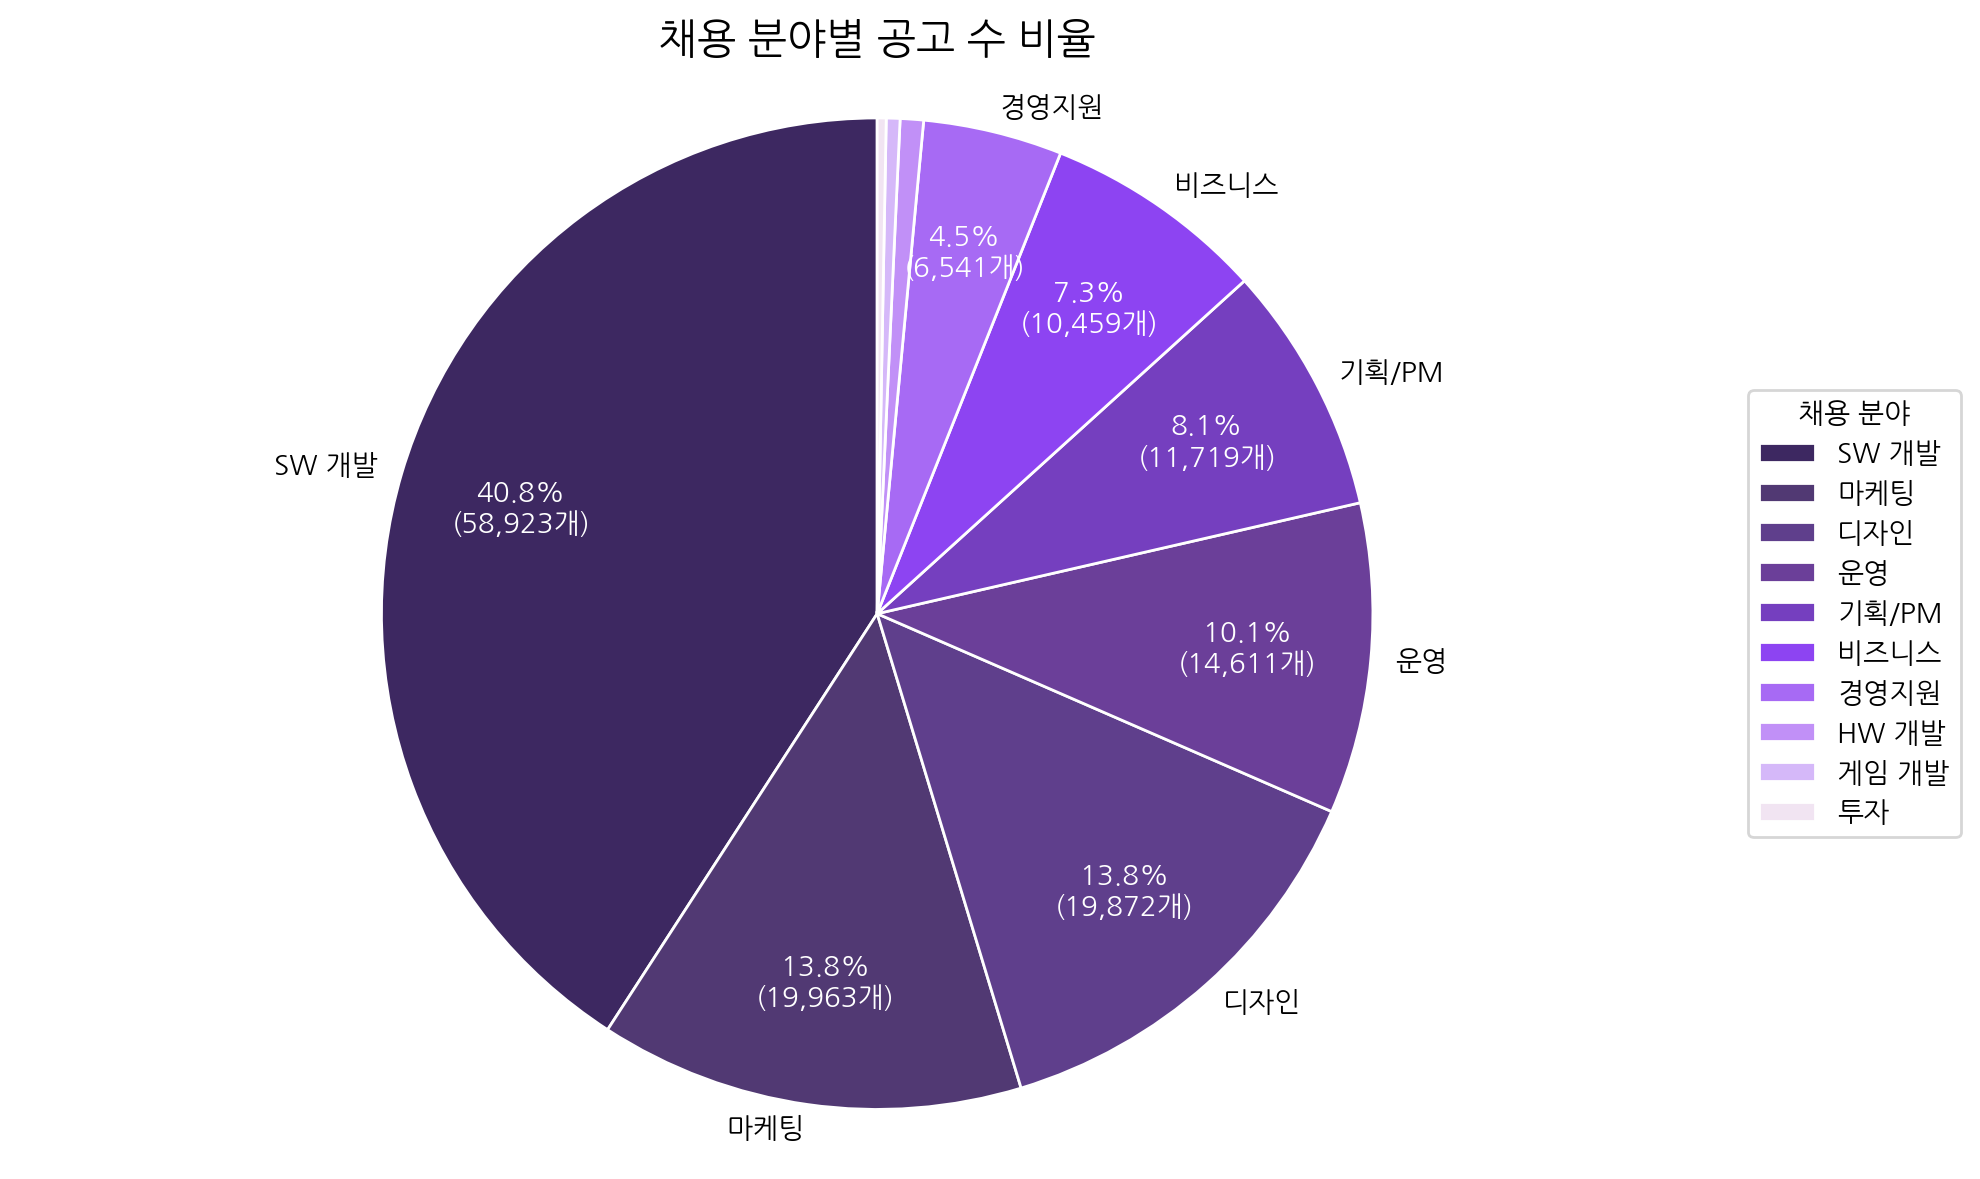

In [106]:
plt.figure(figsize=(10, 6))

# 색상 설정
# colors = ['#513973', '#753FBF','#8D44F2', '#F1E4F2']
colors = [ '#3D2861', '#513973', '#5F3F8C', '#6B3F99', '#753FBF', '#8D44F2', '#A76AF4', '#C190F7', '#D5B8F9', '#F1E4F2']


color_gradient = [colors[min(int(i//(len(job_postings_per_field)/len(colors))), len(colors)-1)] for i in range(len(job_postings_per_field))]

# 3% 이하 항목 처리를 위한 라벨 생성
total = sum(job_postings_per_field)
labels = [label if (count/total)*100 >= 3 else '' for label, count in job_postings_per_field.items()]

# 커스텀 라벨 함수 생성
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,}개)' if pct >= 3 else ''
    return my_autopct

# 파이 차트 생성
wedges, texts, autotexts = plt.pie(job_postings_per_field, 
        labels=labels,  # 수정된 라벨 적용
        autopct=make_autopct(job_postings_per_field), 
        startangle=90, 
        colors=color_gradient, 
        wedgeprops={'edgecolor': 'white'},
        textprops={'color': 'white'},
        labeldistance=1.05,
        pctdistance=0.75)

# 외부 라벨 색상을 검정색으로 변경
for text in texts:
    text.set_color('black')

plt.title('채용 분야별 공고 수 비율', fontsize=15)

# 범례 추가
plt.legend(job_postings_per_field.index, title="채용 분야", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
# 가설 2. 소셜 기능을 활용하는 사람들의 이탈율이 적을까?